<a href="https://colab.research.google.com/github/ParhamPishro/Flavone/blob/main/4%20Correlation%20and%20Importance%20of%20Features/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import r2_score


Read Data

In [2]:
df = pd.read_excel("/content/FlavoneData.xlsx")
df


,authors,flavone,cell line,time,dose,viability-mean,viability-error,viability-SD,viability-SE
0,Wang and Renquan 2023,Acacetin,TE 1,24,20.0,90.247253,97.664835,7.417582,NaN
1,Wang and Renquan 2023,Acacetin,TE 1,24,40.0,81.593407,88.186813,6.593407,NaN
2,Wang and Renquan 2023,Acacetin,TE 1,24,60.0,42.857143,46.565934,3.708791,NaN
3,Wang and Renquan 2023,Acacetin,TE 1,48,20.0,76.648352,84.065934,7.417582,NaN
4,Wang and Renquan 2023,Acacetin,TE 1,48,40.0,63.049451,68.818681,5.769231,NaN
...,...,...,...,...,...,...,...,...,...
466,Liu et al. 2017,Luteolin,EC 109,24,100.0,55.459459,59.351351,3.891892,NaN
467,Liu et al. 2017,Luteolin,KYSE 150,24,10.0,96.000000,99.567568,3.567568,NaN
468,Liu et al. 2017,Luteolin,KYSE 150,24,20.0,86.270270,90.162162,3.891892,NaN
469,Liu et al. 2017,Luteolin,KYSE 150,24,50.0,77.837838,81.729730,3.891892,NaN


Data Transformation


In [10]:
df_numeric = df.copy()

In [11]:
le_f = LabelEncoder() #1
le_c = LabelEncoder() #1

df_numeric['flavone'] = le_f.fit_transform(df_2['flavone']) #2,3
df_numeric['cell line'] = le_c.fit_transform(df_2['cell line']) #2,3


In [12]:
df_numeric

,authors,flavone,cell line,time,dose,viability-mean,viability-error,viability-SD,viability-SE
0,Wang and Renquan 2023,0,10,24,20.0,90.247253,97.664835,7.417582,NaN
1,Wang and Renquan 2023,0,10,24,40.0,81.593407,88.186813,6.593407,NaN
2,Wang and Renquan 2023,0,10,24,60.0,42.857143,46.565934,3.708791,NaN
3,Wang and Renquan 2023,0,10,48,20.0,76.648352,84.065934,7.417582,NaN
4,Wang and Renquan 2023,0,10,48,40.0,63.049451,68.818681,5.769231,NaN
...,...,...,...,...,...,...,...,...,...
466,Liu et al. 2017,6,1,24,100.0,55.459459,59.351351,3.891892,NaN
467,Liu et al. 2017,6,4,24,10.0,96.000000,99.567568,3.567568,NaN
468,Liu et al. 2017,6,4,24,20.0,86.270270,90.162162,3.891892,NaN
469,Liu et al. 2017,6,4,24,50.0,77.837838,81.729730,3.891892,NaN


Exhaustive Feature Selector

In [13]:
X = df_numeric[['flavone', 'cell line', 'time', 'dose']]
y = df_numeric['viability-mean']


In [14]:
dtr = DecisionTreeRegressor()

In [17]:
warnings.filterwarnings("ignore")

efs = EFS(dtr, min_features=1, max_features=2, scoring='r2', print_progress=True, cv=5)
efs = efs.fit(X, y)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
efs.subsets_

Features: 10/10

Best accuracy score:  0.5109092885255413
Best subset (indices): (2, 3)
Best subset (corresponding names): ('time', 'dose')


{0: {'feature_idx': (0,),
  'cv_scores': array([ 0.04237827,  0.15334279, -0.08804498,  0.31200937, -0.21194276]),
  'avg_score': 0.04154853978748563,
  'feature_names': ('flavone',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.06688188,  0.07590639, -0.40684499, -0.01487666, -0.28452847]),
  'avg_score': -0.1394451203933756,
  'feature_names': ('cell line',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([ 0.13859511,  0.18399908, -0.16079431, -0.03162827,  0.18900622]),
  'avg_score': 0.06383556586222765,
  'feature_names': ('time',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.27877466, 0.23780708, 0.11988833, 0.50279356, 0.29768411]),
  'avg_score': 0.2873895464922075,
  'feature_names': ('dose',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([ 0.11450673,  0.33485119, -0.31803454,  0.1241341 , -0.05125773]),
  'avg_score': 0.040839950471523515,
  'feature_names': ('flavone', 'cell line')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([ 0.18130306,  0.3117

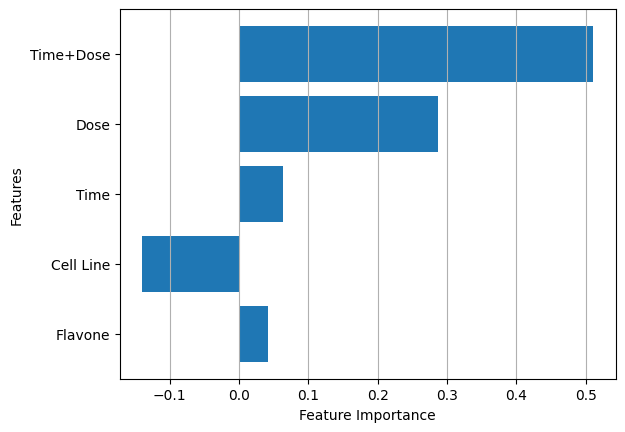

In [18]:
y_for_bar=['Flavone', 'Cell Line', 'Time', 'Dose', 'Time+Dose']

# getting values against each value of y
x_for_bar=[0.04154853978748563, -0.1394451203933756, 0.06383556586222765, 0.2873895464922075, 0.5109092885255413]
plt.barh(y_for_bar, x_for_bar)

# setting label of y-axis
plt.ylabel("Features")

# setting label of x-axis
plt.xlabel("Feature Importance")
#plt.title("Horizontal bar graph")
plt.grid(axis='x')
plt.show()
